# Introduction
* 북미에서 판매되고 있는 SUV 60종을 크기를 기준으로 Kmeans Clustering 하여 Maxcruz의 크기기준 **경쟁차량 파악**

In [1]:
import pandas as pd
import urllib.request, json
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
%matplotlib inline

In [53]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [54]:
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV'

In [55]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV')

In [56]:
data = open('real_final_suv_seg.json').read()
data = pd.DataFrame(json.loads(data))

In [57]:
data.index = [ x for x in range(len(data))]
data.columns

Index(['Brand', 'GLOBAL_SEGMENT', 'MPG_avg', 'Segment', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'baseMSRP', 'base_weight', 'cargo_space',
       'exterior', 'f_head', 'f_hip', 'f_leg', 'f_shoulder', 'height',
       'horsepower', 'interior', 'length', 'make_name', 'model_name',
       'pass_capa', 'pass_vol', 's_head', 's_hip', 's_leg', 's_shoulder',
       'track_width_front', 'track_width_rear', 'wheelbase', 'width'],
      dtype='object')

In [58]:
from sklearn.cluster import KMeans
import mglearn

In [59]:
data[data['model_name']=='range-rover'].index

Int64Index([26], dtype='int64')

In [60]:
data = data.drop([26,56])

In [61]:
data['interior'] = data[['pass_capa', 'f_head', 'f_leg','cargo_space','pass_vol',
       'f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip']].sum(axis=1)

data['exterior'] = data[['wheelbase', 'length', 'width', 'height',
       'track_width_front', 'track_width_rear']].sum(axis=1)
data['full_size'] = data['interior'] + data['exterior']

In [ ]:
feature = ['pass_capa', 'f_head', 'f_leg','f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip',
        'wheelbase', 'length', 'width', 'height','track_width_front', 'track_width_rear',
            'baseMSRP','full_size','cargo_space','pass_vol']
cluster_value = data[feature].values


kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(cluster_value)

labels = ['MidLarge_SUV','Midsize_SUV','Largesize_SUV' ]
plot_x = pd.DataFrame(cluster_value)[15]
plot_y = pd.DataFrame(cluster_value)[16]


label_color = {0:'red',1:'green',2:'blue'}
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors =[current_palette[1],'#359cfb','blue']

fig, ax = plt.subplots(1, figsize=(15,8))
mglearn.discrete_scatter(cluster_value[:, 15], cluster_value[:, 16], kmeans.labels_, markers='o',c=colors, s=13)




    
plt.xlabel('Price', fontsize=15, weight='bold')
plt.ylabel('Exterior+Interior Size', fontsize=15, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=15)

ax.legend(labels,loc='upper center',bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=4, prop={'size':15})

ax.annotate('Maxcruz', xy=(cluster_value[30][15], cluster_value[30][16]), xytext=(cluster_value[30][15]-13000, cluster_value[30][16]+15),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='black')

ax.annotate('Santa Fe', xy=(cluster_value[31][15], cluster_value[31][16]), xytext=(cluster_value[31][15]-8500, cluster_value[31][16]-15),
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize=20, color='black')



plt.title('첫번째 Segment', fontsize=17, weight='bold')

plt.savefig('첫번째 Segment.png')

plt.show()


In [62]:
feature = ['pass_capa', 'f_head', 'f_leg','f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip',
        'wheelbase', 'length', 'width', 'height','track_width_front', 'track_width_rear',
            'baseMSRP','full_size','cargo_space','pass_vol']
cluster_value = data[feature].values

In [63]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(cluster_value)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [64]:
cluster_value[0][16]

1193.0

In [65]:
data.index = [x for x in range(len(data))]

In [66]:
data[data['model_name']=='santa-fe-sport'].index

Int64Index([31], dtype='int64')

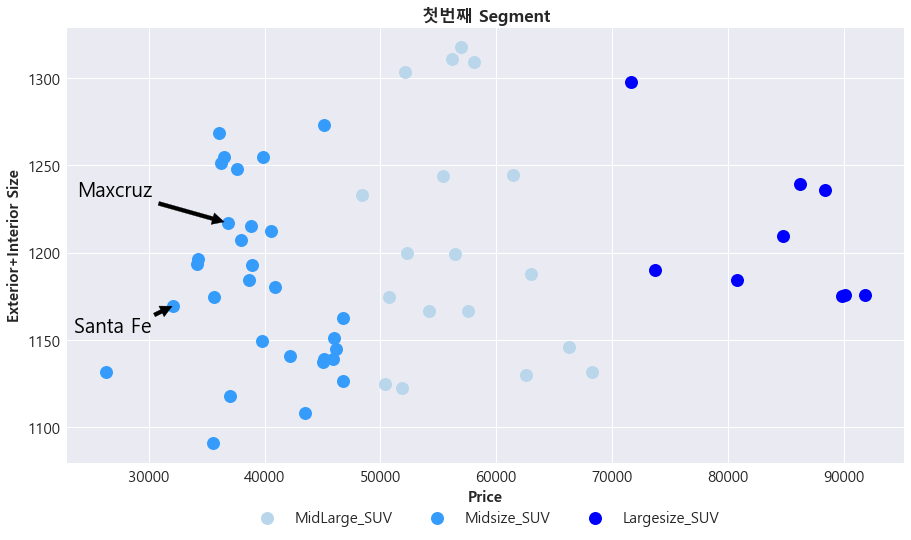

In [68]:
labels = ['MidLarge_SUV','Midsize_SUV','Largesize_SUV' ]
plot_x = pd.DataFrame(cluster_value)[15]
plot_y = pd.DataFrame(cluster_value)[16]


label_color = {0:'red',1:'green',2:'blue'}
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors =[current_palette[1],'#359cfb','blue']

fig, ax = plt.subplots(1, figsize=(15,8))
mglearn.discrete_scatter(cluster_value[:, 15], cluster_value[:, 16], kmeans.labels_, markers='o',c=colors, s=13)




    
plt.xlabel('Price', fontsize=15, weight='bold')
plt.ylabel('Exterior+Interior Size', fontsize=15, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=15)

ax.legend(labels,loc='upper center',bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=4, prop={'size':15})

ax.annotate('Maxcruz', xy=(cluster_value[30][15], cluster_value[30][16]), xytext=(cluster_value[30][15]-13000, cluster_value[30][16]+15),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='black')

ax.annotate('Santa Fe', xy=(cluster_value[31][15], cluster_value[31][16]), xytext=(cluster_value[31][15]-8500, cluster_value[31][16]-15),
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize=20, color='black')



plt.title('첫번째 Segment', fontsize=17, weight='bold')

plt.savefig('첫번째 Segment.png')

plt.show()


In [174]:
kmeans.labels_
# 1이 Midsize
# 2가 Large
# 0 이 Midlarge

array([1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2])

In [31]:
data['model_name'][:10]

0           4runner
1            acadia
2         gle-class
3         gle-coupe
4            armada
5    grand-cherokee
6                gx
7        highlander
8      land-cruiser
9                lx
Name: model_name, dtype: object

In [175]:
segment_suv2 = pd.concat( [ pd.DataFrame(kmeans.labels_), pd.DataFrame(data['model_name'])] ,axis=1)

In [176]:
segment_suv2.columns = ['Segment','model_name']
segment_suv2.loc[segment_suv2['Segment']==0, 'Segment'] = 'MidLarge_SUV'
segment_suv2.loc[segment_suv2['Segment']==1, 'Segment'] = 'Midsize_SUV'
segment_suv2.loc[segment_suv2['Segment']==2, 'Segment'] = 'Largesize_SUV'

test = pd.merge(data, segment_suv2, on='model_name')

In [177]:
test = test.drop(['Segment_x'], axis=1)

In [179]:
test.to_csv('real_final_suv_seg2.csv')
test.to_json('real_final_suv_seg2.json')

In [307]:
exer = pd.merge(segment_suv, segment_suv2, on='Model')
exer.to_csv('세그먼트 변화.csv')

In [309]:
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec'

In [133]:
data[data['model_name']=='pilot']

,model_name,make_name,pass_capa,pass_vol,f_head,f_leg,f_shoulder,f_hip,s_head,s_leg,...,s_hip,base_weight,wheelbase,length,width,height,track_width_front,track_width_rear,interior,exterior
9,pilot,honda,8,151.7,39.5,40.9,62.0,59.1,39.9,38.4,...,57.3,4288.0,111.0,194.5,78.6,69.8,66.3,66.3,558.8,586.5


In [100]:
data[data['model_name']=='srx']

,model_name,make_name,pass_capa,pass_vol,f_head,f_leg,f_shoulder,f_hip,s_head,s_leg,...,s_hip,base_weight,wheelbase,length,width,height,track_width_front,track_width_rear,interior,exterior
4,srx,cadillac,5,111.6293,39.7,41.2,58.3,55.4,38.4,36.3,...,54.7,4442.0,110.5,190.3,75.2,65.7,63.8,63.4,496.9293,568.9


In [115]:
data = open('final_all_sell(year).json').read()
test = pd.DataFrame(json.loads(data))
test[test['GLOBAL_MODEL'] == 'Highlander']

,Brand,GLOBAL_MODEL,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
227,Toyota,Highlander,SUV-D,Toyota,121054,127573,146127,158915,191379


## 두번째 Segment

In [24]:
data = open('real_final_suv_seg2.json').read()
data = pd.DataFrame(json.loads(data))

In [25]:
suv_table = data

In [26]:
SUV_D_cluster = suv_table[suv_table["Segment_y"] == 'Midsize_SUV']

In [27]:
SUV_D_cluster.columns

Index(['Brand', 'GLOBAL_SEGMENT', 'MPG_avg', 'Segment_y', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'baseMSRP', 'base_weight', 'cargo_space',
       'exterior', 'f_head', 'f_hip', 'f_leg', 'f_shoulder', 'full_feature',
       'full_size', 'height', 'horsepower', 'interior', 'length', 'make_name',
       'model_name', 'pass_capa', 'pass_vol', 's_head', 's_hip', 's_leg',
       's_shoulder', 'track_width_front', 'track_width_rear', 'wheelbase',
       'width'],
      dtype='object')

In [28]:
SUV_D_cluster['interior'] = SUV_D_cluster[['pass_capa', 'f_head', 'f_leg','cargo_space','pass_vol',
       'f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip']].sum(axis=1)

SUV_D_cluster['exterior'] = SUV_D_cluster[['wheelbase', 'length', 'width', 'height',
       'track_width_front', 'track_width_rear']].sum(axis=1)



SUV_D_cluster['full_size'] = SUV_D_cluster['exterior'] + SUV_D_cluster['interior']

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [29]:
SUV_D_cluster.index = SUV_D_cluster['model_name']

feature = ['pass_capa', 'f_head', 'f_leg','f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip',
        'wheelbase', 'length', 'width', 'height','track_width_front', 'track_width_rear',
           'baseMSRP','full_size','cargo_space','pass_vol']
cluster_value = SUV_D_cluster[feature].values

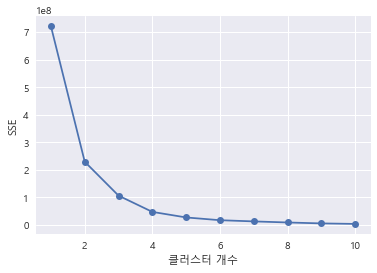

In [30]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(cluster_value)

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_value)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
SUV_D_cluster.index = [x for x in range(len(SUV_D_cluster))]
SUV_D_cluster[SUV_D_cluster['model_name']=='santa-fe'].index

Int64Index([14], dtype='int64')

In [33]:
cluster_value[0][16]

1193.0

In [39]:
SUV_D_cluster['model_name'].unique()

array(['4runner', 'acadia', 'mkx', 'murano', 'nx', 'outlander',
       'pathfinder', 'pilot', 'q5', 'qx50', 'explorer', 'cx-9', 'rdx',
       'rx', 'santa-fe', 'santa-fe-sport', 'flex', 'sorento', 'srx',
       'discovery-sport', 'traverse', 'x3', 'xc60', 'grand-cherokee',
       'durango', 'edge', 'enclave', 'fx', 'glc-class', 'highlander'], dtype=object)

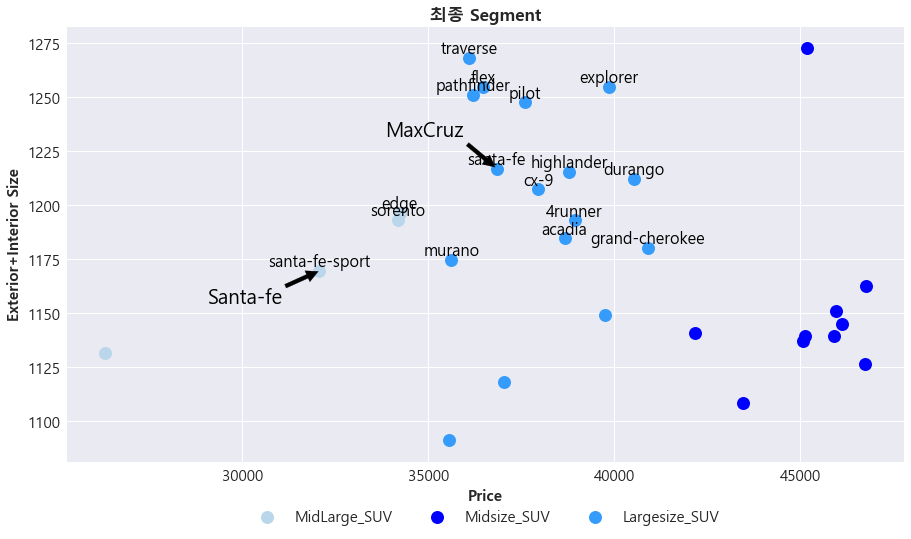

In [52]:
labels = ['MidLarge_SUV','Midsize_SUV','Largesize_SUV' ]
plot_x = pd.DataFrame(cluster_value)[15]
plot_y = pd.DataFrame(cluster_value)[16]
sort_list = [0,1,3,6,7,10,11,14,15,16,17,20,23,24,25,29]
model_name_list = SUV_D_cluster.loc[sort_list]['model_name'].values
hap_list = zip(sort_list, model_name_list)

label_color = {0:'red',1:'green',2:'blue'}
colors =['#567aff','#359cfb','blue']
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors =[current_palette[1],'blue','#359cfb']


fig, ax = plt.subplots(1, figsize=(15,8))
mglearn.discrete_scatter(cluster_value[:, 15], cluster_value[:, 16], kmeans.labels_, markers='o',c=colors, s=13)




for i, txt in hap_list:
    ax.annotate(txt, (cluster_value[i][15],cluster_value[i][16]+2.0), color='black', 
                size=16, ha='center')

    
plt.xlabel('Price', fontsize=15, weight='bold')
plt.ylabel('Exterior+Interior Size', fontsize=15, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=15)

ax.legend(labels,loc='upper center',bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=4, prop={'size':15})

ax.annotate('MaxCruz', xy=(cluster_value[14][15], cluster_value[14][16]), xytext=(cluster_value[14][15]-3000, cluster_value[14][16]+15),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='black')

ax.annotate('Santa-fe', xy=(cluster_value[15][15], cluster_value[15][16]), xytext=(cluster_value[15][15]-3000, cluster_value[15][16]-15),
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize=20, color='black')



plt.title('최종 Segment', fontsize=17, weight='bold')

plt.savefig('최종 Segment.png')

plt.show()


In [56]:
kmeans.labels_
# 0은 Seg1
# 4는 Seg3
# 3은 Seg5
# 2는 Seg2
# 1은 Seg4

array([0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 4, 0, 2, 3, 1, 1, 2, 0, 2, 0, 4, 4, 4, 0, 0, 2, 4, 0])

In [59]:
segment_suv2 = pd.concat( [ pd.DataFrame(kmeans.labels_), pd.DataFrame(SUV_D_cluster['model_name'])] ,axis=1)

In [61]:
segment_suv2.columns = ['Segment','model_name']
segment_suv2.loc[segment_suv2['Segment']==0, 'Segment'] = 'Seg1'
segment_suv2.loc[segment_suv2['Segment']==1, 'Segment'] = 'Seg4'
segment_suv2.loc[segment_suv2['Segment']==2, 'Segment'] = 'Seg2'
segment_suv2.loc[segment_suv2['Segment']==3, 'Segment'] = 'Seg5'
segment_suv2.loc[segment_suv2['Segment']==4, 'Segment'] = 'Seg3'

In [63]:
test = pd.merge(SUV_D_cluster, segment_suv2, on='model_name')